# Lecture 06

In [1]:
from sklearn.datasets import load_digits, load_iris, load_wine, load_boston, load_breast_cancer

In [2]:
load_func = load_wine # dự đoán chất lượng rượu
data = load_func(as_frame=True)
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [3]:
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
df = data['frame']
display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

None

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df['target'].value_counts(dropna=False)

1    71
0    59
2    48
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

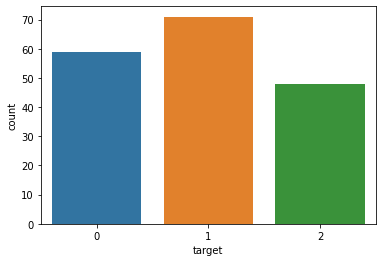

In [7]:
sns.countplot(data=df, x='target')

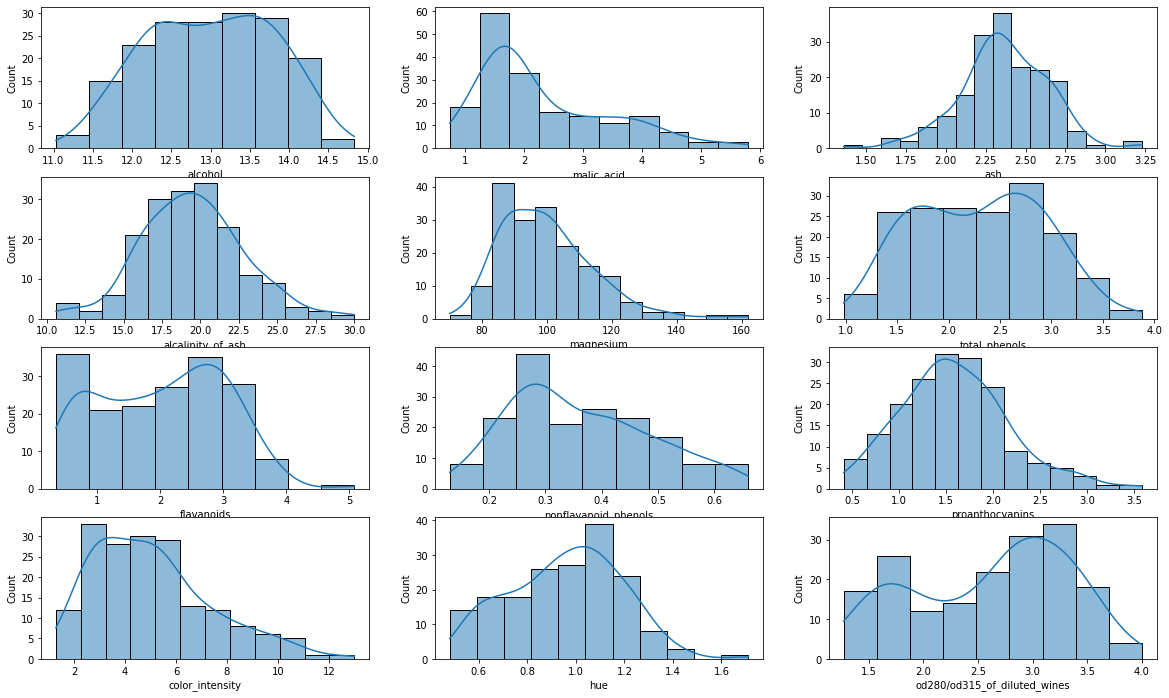

In [8]:
fig, axs = plt.subplots(4, 3, figsize=(20, 12))

for col_name, ax in zip(df.columns, axs.ravel()):
    sns.histplot(data=df, x=col_name, kde=True, ax=ax)

In [9]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [10]:
X, y = df.drop(columns='target'), df['target']
y = y.gt(0).astype(int)

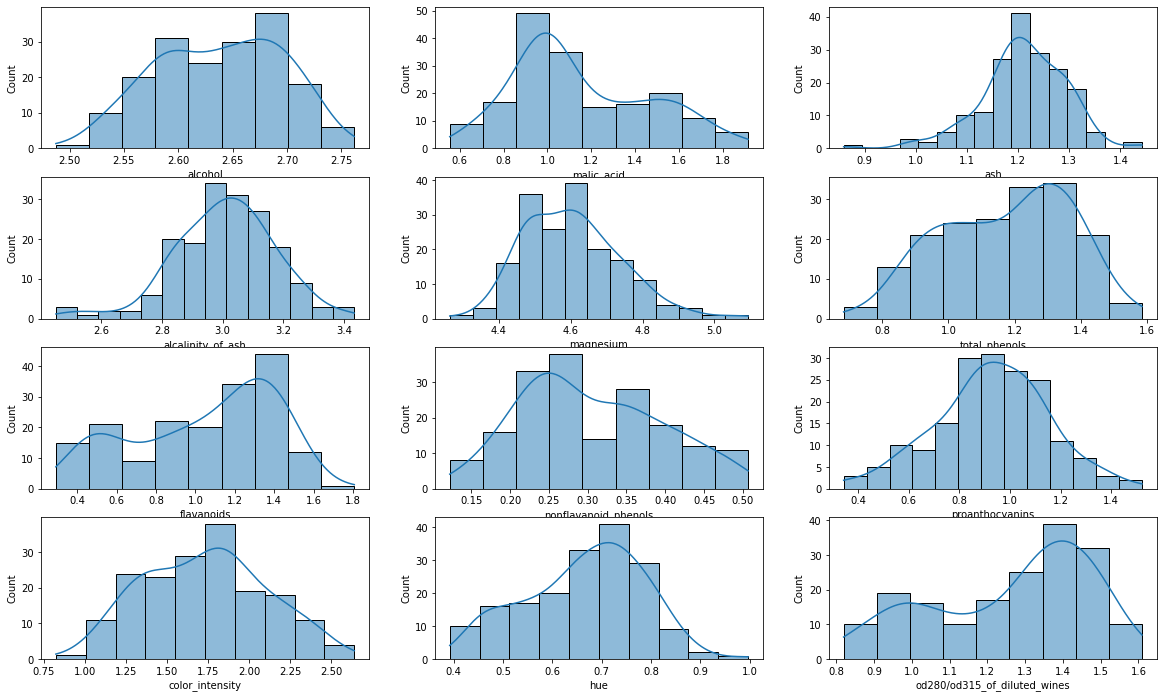

In [12]:
fig, axs = plt.subplots(4, 3, figsize=(20, 12))

for col_name, ax in zip(X.columns, axs.ravel()):
    sns.histplot(data=np.log1p(X), x=col_name, kde=True, ax=ax) # log1p là lấy số cộng 1 để lấy log để tránh trường hợp x=0
    # lấy log thì các giá trị ở rất xa vào gần lại làm phân phối tiệm cận phân phôi chuẩn. Log không thể lấy âm được thay bằng np.log(). Dữ liệu vừa âm vừa dương thì lấy np.sign() lấy dấu

In [ ]:
# vừa âm vừa dương
def negative_log(x):
    return np.sign(x).np.log(np.abs())

In [13]:
# fit transform toàn bộ bộ dữ liệu
scaler = RobustScaler()
X_scaled = scaler.fit_transform(np.log1p(X))
X_scaled

array([[ 0.85917126, -0.12353814,  0.20060332, ...,  0.21603422,
         0.75230999,  0.6770158 ],
       [ 0.1131385 , -0.0668929 , -0.65882444, ...,  0.24423447,
         0.43348995,  0.65605412],
       [ 0.08308552,  0.35399903,  0.85858355, ...,  0.18769538,
         0.28025486,  0.8348034 ],
       ...,
       [ 0.16552808,  1.35794038, -0.29394732, ..., -1.22117851,
        -1.11231041,  0.31751803],
       [ 0.09060671,  0.50106624,  0.0289121 , ..., -1.18502202,
        -1.04618813,  0.3263384 ],
       [ 0.78898803,  1.28089744,  1.0424012 , ..., -1.14909081,
        -1.06805912, -0.27253479]])

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 420)
scaler = RobustScaler()
scaler.fit(x_train) # tính toán các thông số về phân phối dựa trên dứ liệu train

RobustScaler()

In [ ]:
scaler.transform(x_test) # scaler dữ liệu test dựa trên bộ dữ liệu train
# cho kết qủa tương đối khác so với fit transform đặc biệt theo trường hợp dữ liệu split không đều theo phân phối

In [82]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.859171,-0.123538,0.200603,-0.994948,1.327738,0.381901,0.458575,-0.369778,0.933410,0.289007,0.216034,0.752310,0.677016
1,0.113138,-0.066893,-0.658824,-2.446979,0.103365,0.258412,0.322426,-0.496899,-0.420396,-0.104857,0.244234,0.433490,0.656054
2,0.083086,0.353999,0.858584,-0.211677,0.154283,0.381901,0.535514,-0.244627,1.475141,0.300249,0.187695,0.280255,0.834803
3,0.956657,0.064944,0.397154,-0.665868,0.729108,1.129995,0.637123,-0.626055,0.807867,0.816171,-0.316677,0.465741,1.163374
4,0.143107,0.501066,1.374828,0.332955,0.950948,0.381901,0.289095,0.295713,0.364325,-0.125849,0.216034,0.111070,0.129074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.489063,1.870347,0.257167,0.224561,-0.159031,-0.688781,-1.181919,1.017409,-0.794995,0.794779,-1.042621,-0.918369,0.139089
174,0.262145,1.196567,0.341401,0.743204,0.204704,-0.554472,-1.034033,0.524723,-0.215685,0.706680,-0.835403,-1.112310,0.158917
175,0.165528,1.357940,-0.293947,0.113617,1.037085,-0.793521,-1.095910,0.524723,-0.308759,1.267571,-1.221179,-1.112310,0.317518
176,0.090607,0.501066,0.028912,0.113617,1.037085,-0.723298,-1.106435,1.070341,-0.139876,1.110773,-1.185022,-1.046188,0.326338


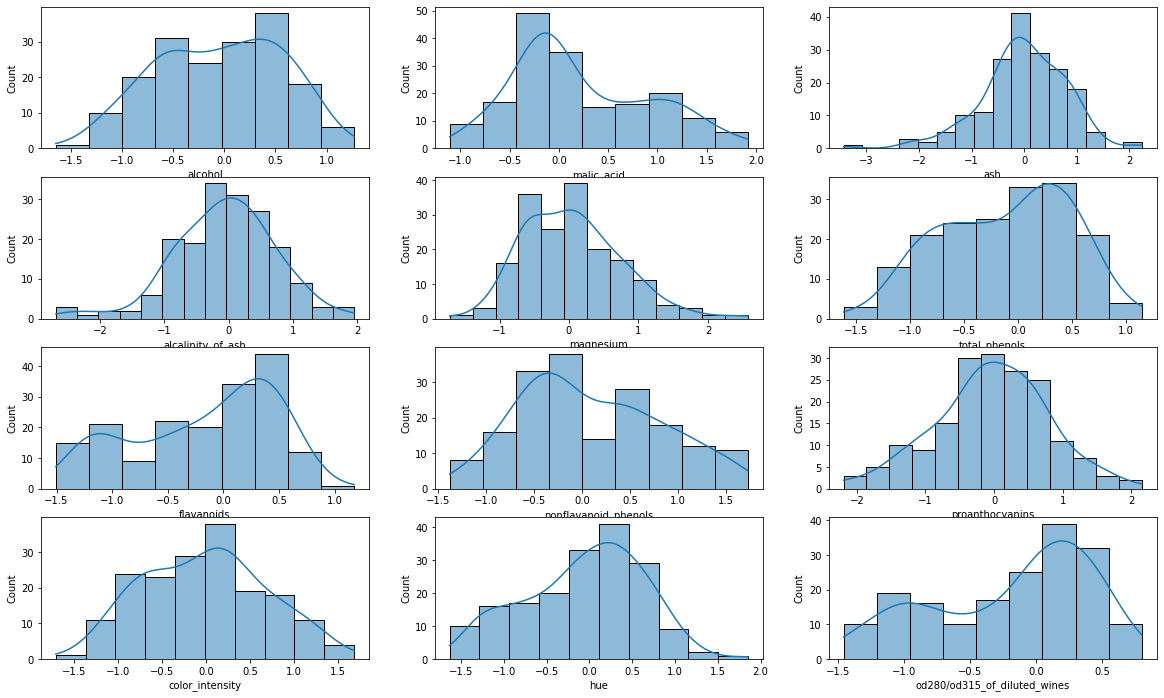

In [83]:
fig, axs = plt.subplots(4, 3, figsize=(20, 12))

for col_name, ax in zip(X_scaled.columns, axs.ravel()):
    sns.histplot(data=X_scaled, x=col_name, kde=True, ax=ax)

<AxesSubplot:xlabel='alcohol', ylabel='malic_acid'>

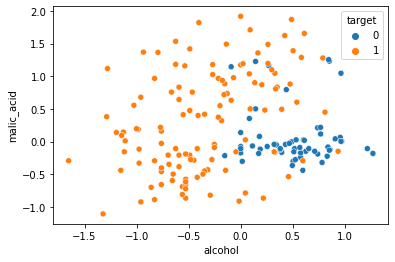

In [84]:
sns.scatterplot(data=X_scaled, x='alcohol', y='malic_acid', hue=y, palette='tab10')

![](https://scikit-learn.org/stable/_images/grid_search_workflow.png)

In [85]:
from sklearn.model_selection import train_test_split, KFold

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7)
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(124, 13)

(54, 13)

(124,)

(54,)

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        33

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



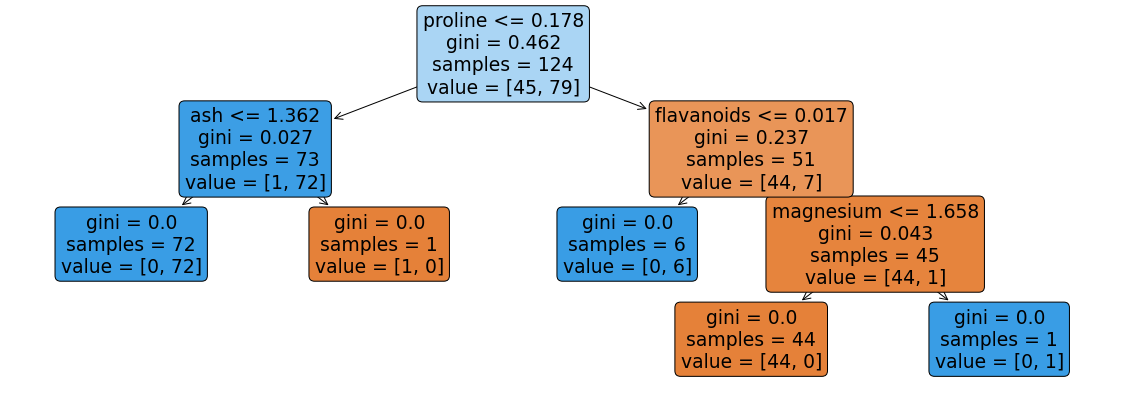

In [88]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20, 7))
ax = plt.subplot()
_ = plot_tree(tree, max_depth=3, feature_names=X.columns, ax=ax, filled=True, rounded=True)

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [91]:
from sklearn.model_selection import cross_validate, cross_val_score

In [126]:
cv = KFold()

tree = DecisionTreeClassifier()
tree_scores = cross_val_score(tree, X_scaled, y, cv=cv, n_jobs=2)

In [127]:
tree_scores

array([0.80555556, 0.97222222, 0.91666667, 0.94285714, 0.97142857])

In [128]:
print(f'{tree_scores.mean()*100:.2f} accuracy with a standard deviation of {tree_scores.std()*100:.2f}')

92.17 accuracy with a standard deviation of 6.16


In [129]:
cv = KFold()

tree = DecisionTreeClassifier()
scoring = ['accuracy', 'precision', 'recall', 'f1']
tree_scores = cross_validate(tree, X_scaled, y, cv=cv, n_jobs=2, scoring=scoring)

In [107]:
tree_scores.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

In [130]:
tree_scores = pd.DataFrame(tree_scores)
tree_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.005002,0.008026,0.805556,0.000000,0.000000,0.000000
1,0.004999,0.007026,0.944444,0.866667,1.000000,0.928571
2,0.002000,0.003996,0.916667,1.000000,0.916667,0.956522
3,0.001998,0.004002,0.800000,1.000000,0.800000,0.888889
4,0.002002,0.002997,0.828571,1.000000,0.828571,0.906250


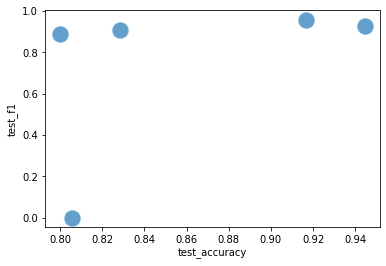

In [131]:
ax = sns.scatterplot(data=tree_scores, x='test_accuracy', y='test_f1', s=300, alpha=0.7)

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
cv = KFold()

forest = RandomForestClassifier()
forest_scores = cross_validate(forest, X_scaled, y, cv=cv, n_jobs=2, scoring=scoring)

In [134]:
forest_scores = pd.DataFrame(forest_scores)
forest_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.122999,0.011000,0.861111,0.000000,0.000000,0.000000
1,0.123996,0.011000,0.972222,0.928571,1.000000,0.962963
2,0.101000,0.010999,0.972222,1.000000,0.972222,0.985915
3,0.104001,0.010000,1.000000,1.000000,1.000000,1.000000
4,0.101012,0.011000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='test_accuracy', ylabel='test_f1'>

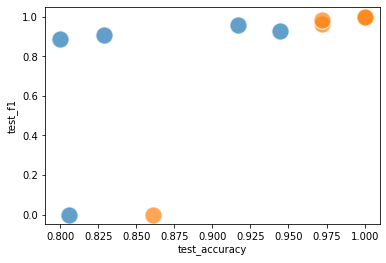

In [135]:
sns.scatterplot(data=tree_scores, x='test_accuracy', y='test_f1', s=300, alpha=0.7)
sns.scatterplot(data=forest_scores, x='test_accuracy', y='test_f1', s=300, alpha=0.7)

In [136]:
from sklearn.model_selection import GridSearchCV

In [147]:
param_grid = {
    'max_features': [2, 4, 5],
    'max_depth': [3, 5, 7, 10]
}

forest = RandomForestClassifier()
gs = GridSearchCV(forest, param_grid, scoring=scoring, cv=cv, n_jobs=2, verbose=5, refit=False)
gs_result = gs.fit(X_scaled, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [148]:
gs_result

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_depth': [3, 5, 7, 10], 'max_features': [2, 4, 5]},
             refit=False, scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=5)

In [149]:
gs_result.cv_results_

{'mean_fit_time': array([0.10239868, 0.10420232, 0.10620084, 0.10559611, 0.10640693,
        0.10759168, 0.10520544, 0.10660038, 0.10300517, 0.1036108 ,
        0.10660739, 0.10580044]),
 'std_fit_time': array([0.00224481, 0.00115969, 0.00213437, 0.00371998, 0.00534006,
        0.00570864, 0.00476019, 0.00224496, 0.0011012 , 0.00280276,
        0.00404059, 0.00214504]),
 'mean_score_time': array([0.01080027, 0.01079612, 0.01079969, 0.01059942, 0.01059332,
        0.01081157, 0.01279898, 0.01160355, 0.01039805, 0.01079221,
        0.01079578, 0.0107995 ]),
 'std_score_time': array([0.00074856, 0.00039838, 0.00039973, 0.00049041, 0.00049319,
        0.00075284, 0.00182592, 0.00080625, 0.00048754, 0.00039608,
        0.00039751, 0.00074823]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=obj

In [152]:
gs_result_df = pd.DataFrame(gs_result.cv_results_)
gs_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.102399,0.002245,0.010800,0.000749,3,2,"{'max_depth': 3, 'max_features': 2}",0.833333,0.972222,0.972222,...,0.397368,1,0.0,0.962963,0.985915,1.0,1.0,0.789776,0.395120,1
1,0.104202,0.001160,0.010796,0.000398,3,4,"{'max_depth': 3, 'max_features': 4}",0.888889,0.972222,0.916667,...,0.392994,9,0.0,0.962963,0.956522,1.0,1.0,0.783897,0.392367,9
2,0.106201,0.002134,0.010800,0.000400,3,5,"{'max_depth': 3, 'max_features': 5}",0.888889,0.972222,0.916667,...,0.392994,9,0.0,0.962963,0.956522,1.0,1.0,0.783897,0.392367,9
3,0.105596,0.003720,0.010599,0.000490,5,2,"{'max_depth': 5, 'max_features': 2}",0.861111,0.972222,0.972222,...,0.397368,1,0.0,0.962963,0.985915,1.0,1.0,0.789776,0.395120,1
4,0.106407,0.005340,0.010593,0.000493,5,4,"{'max_depth': 5, 'max_features': 4}",0.888889,0.972222,0.944444,...,0.395031,5,0.0,0.962963,0.971429,1.0,1.0,0.786878,0.393722,5
5,0.107592,0.005709,0.010812,0.000753,5,5,"{'max_depth': 5, 'max_features': 5}",0.888889,0.972222,0.916667,...,0.392994,9,0.0,0.962963,0.956522,1.0,1.0,0.783897,0.392367,9
6,0.105205,0.004760,0.012799,0.001826,7,2,"{'max_depth': 7, 'max_features': 2}",0.861111,0.972222,0.972222,...,0.397368,1,0.0,0.962963,0.985915,1.0,1.0,0.789776,0.395120,1
7,0.106600,0.002245,0.011604,0.000806,7,4,"{'max_depth': 7, 'max_features': 4}",0.888889,0.972222,0.944444,...,0.395031,5,0.0,0.962963,0.971429,1.0,1.0,0.786878,0.393722,5
8,0.103005,0.001101,0.010398,0.000488,7,5,"{'max_depth': 7, 'max_features': 5}",0.888889,0.972222,0.916667,...,0.392994,9,0.0,0.962963,0.956522,1.0,1.0,0.783897,0.392367,9
9,0.103611,0.002803,0.010792,0.000396,10,2,"{'max_depth': 10, 'max_features': 2}",0.833333,0.972222,0.972222,...,0.397368,1,0.0,0.962963,0.985915,1.0,1.0,0.789776,0.395120,1


In [155]:
params = gs_result_df['params'].apply(pd.Series)
params

,max_depth,max_features
0,3,2
1,3,4
2,3,5
3,5,2
4,5,4
5,5,5
6,7,2
7,7,4
8,7,5
9,10,2


In [156]:
gs_result_df = gs_result_df.join(params)
gs_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,max_depth,max_features
0,0.102399,0.002245,0.010800,0.000749,3,2,"{'max_depth': 3, 'max_features': 2}",0.833333,0.972222,0.972222,...,0.0,0.962963,0.985915,1.0,1.0,0.789776,0.395120,1,3,2
1,0.104202,0.001160,0.010796,0.000398,3,4,"{'max_depth': 3, 'max_features': 4}",0.888889,0.972222,0.916667,...,0.0,0.962963,0.956522,1.0,1.0,0.783897,0.392367,9,3,4
2,0.106201,0.002134,0.010800,0.000400,3,5,"{'max_depth': 3, 'max_features': 5}",0.888889,0.972222,0.916667,...,0.0,0.962963,0.956522,1.0,1.0,0.783897,0.392367,9,3,5
3,0.105596,0.003720,0.010599,0.000490,5,2,"{'max_depth': 5, 'max_features': 2}",0.861111,0.972222,0.972222,...,0.0,0.962963,0.985915,1.0,1.0,0.789776,0.395120,1,5,2
4,0.106407,0.005340,0.010593,0.000493,5,4,"{'max_depth': 5, 'max_features': 4}",0.888889,0.972222,0.944444,...,0.0,0.962963,0.971429,1.0,1.0,0.786878,0.393722,5,5,4
5,0.107592,0.005709,0.010812,0.000753,5,5,"{'max_depth': 5, 'max_features': 5}",0.888889,0.972222,0.916667,...,0.0,0.962963,0.956522,1.0,1.0,0.783897,0.392367,9,5,5
6,0.105205,0.004760,0.012799,0.001826,7,2,"{'max_depth': 7, 'max_features': 2}",0.861111,0.972222,0.972222,...,0.0,0.962963,0.985915,1.0,1.0,0.789776,0.395120,1,7,2
7,0.106600,0.002245,0.011604,0.000806,7,4,"{'max_depth': 7, 'max_features': 4}",0.888889,0.972222,0.944444,...,0.0,0.962963,0.971429,1.0,1.0,0.786878,0.393722,5,7,4
8,0.103005,0.001101,0.010398,0.000488,7,5,"{'max_depth': 7, 'max_features': 5}",0.888889,0.972222,0.916667,...,0.0,0.962963,0.956522,1.0,1.0,0.783897,0.392367,9,7,5
9,0.103611,0.002803,0.010792,0.000396,10,2,"{'max_depth': 10, 'max_features': 2}",0.833333,0.972222,0.972222,...,0.0,0.962963,0.985915,1.0,1.0,0.789776,0.395120,1,10,2


In [157]:
mean_cols = [i for i in gs_result_df.columns if i.startswith('mean')]
rank_cols = [i for i in gs_result_df.columns if i.startswith('rank')]
gs_result_df[['max_features', 'max_depth', *mean_cols, *rank_cols]]

,max_features,max_depth,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,rank_test_accuracy,rank_test_precision,rank_test_recall,rank_test_f1
0,2,3,0.102399,0.010800,0.955556,0.785714,0.794444,0.789776,7,1,1,1
1,4,3,0.104202,0.010796,0.955556,0.785714,0.783333,0.783897,7,1,9,9
2,5,3,0.106201,0.010800,0.955556,0.785714,0.783333,0.783897,7,1,9,9
3,2,5,0.105596,0.010599,0.961111,0.785714,0.794444,0.789776,1,1,1,1
4,4,5,0.106407,0.010593,0.961111,0.785714,0.788889,0.786878,1,1,5,5
5,5,5,0.107592,0.010812,0.955556,0.785714,0.783333,0.783897,7,1,9,9
6,2,7,0.105205,0.012799,0.961111,0.785714,0.794444,0.789776,1,1,1,1
7,4,7,0.106600,0.011604,0.961111,0.785714,0.788889,0.786878,1,1,5,5
8,5,7,0.103005,0.010398,0.955556,0.785714,0.783333,0.783897,7,1,9,9
9,2,10,0.103611,0.010792,0.955556,0.785714,0.794444,0.789776,7,1,1,1
